In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [7]:
data= pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [8]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
data.shape

(4340, 8)

In [15]:
for features in data.columns:
    print("feature name is ",features," ",data[features].unique())
#print(data['seller_type'].unique())

feature name is  name   ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
feature name is  year   [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
feature name is  selling_price   [  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  62800

In [16]:
#cheking for null values
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [18]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [19]:
final_dataset=data[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [21]:
final_dataset.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,Petrol,Individual,Manual,First Owner
1,2007,50000,Petrol,Individual,Manual,First Owner
2,2012,100000,Diesel,Individual,Manual,First Owner
3,2017,46000,Petrol,Individual,Manual,First Owner
4,2014,141000,Diesel,Individual,Manual,Second Owner


In [22]:
final_dataset['curr_year']=2020

C:\Users\Pablo\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
final_dataset['no_years']=final_dataset['curr_year']-final_dataset['year']

In [24]:
final_dataset.head()

,year,km_driven,fuel,seller_type,transmission,owner,curr_year,no_years
0,2007,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [30]:
final_dataset.drop(['year'],axis=1,inplace=True)

In [33]:
final_dataset.head()

,km_driven,fuel,seller_type,transmission,owner,no_years
0,70000,Petrol,Individual,Manual,First Owner,13
1,50000,Petrol,Individual,Manual,First Owner,13
2,100000,Diesel,Individual,Manual,First Owner,8
3,46000,Petrol,Individual,Manual,First Owner,3
4,141000,Diesel,Individual,Manual,Second Owner,6


In [32]:
final_dataset.drop(['curr_year'],axis=1,inplace=True)

In [35]:
# dealing with categorical features
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [36]:
final_dataset.head()

,km_driven,no_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [37]:
final_dataset.corr()

,km_driven,no_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
km_driven,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_years,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802
owner_Fourth & Above Owner,0.097349,0.186361,-0.021054,-0.002094,0.013384,0.011502,0.072322,-0.021395,0.035597,1.000000,-0.080648,-0.008648,-0.037849


In [39]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import seaborn as sns

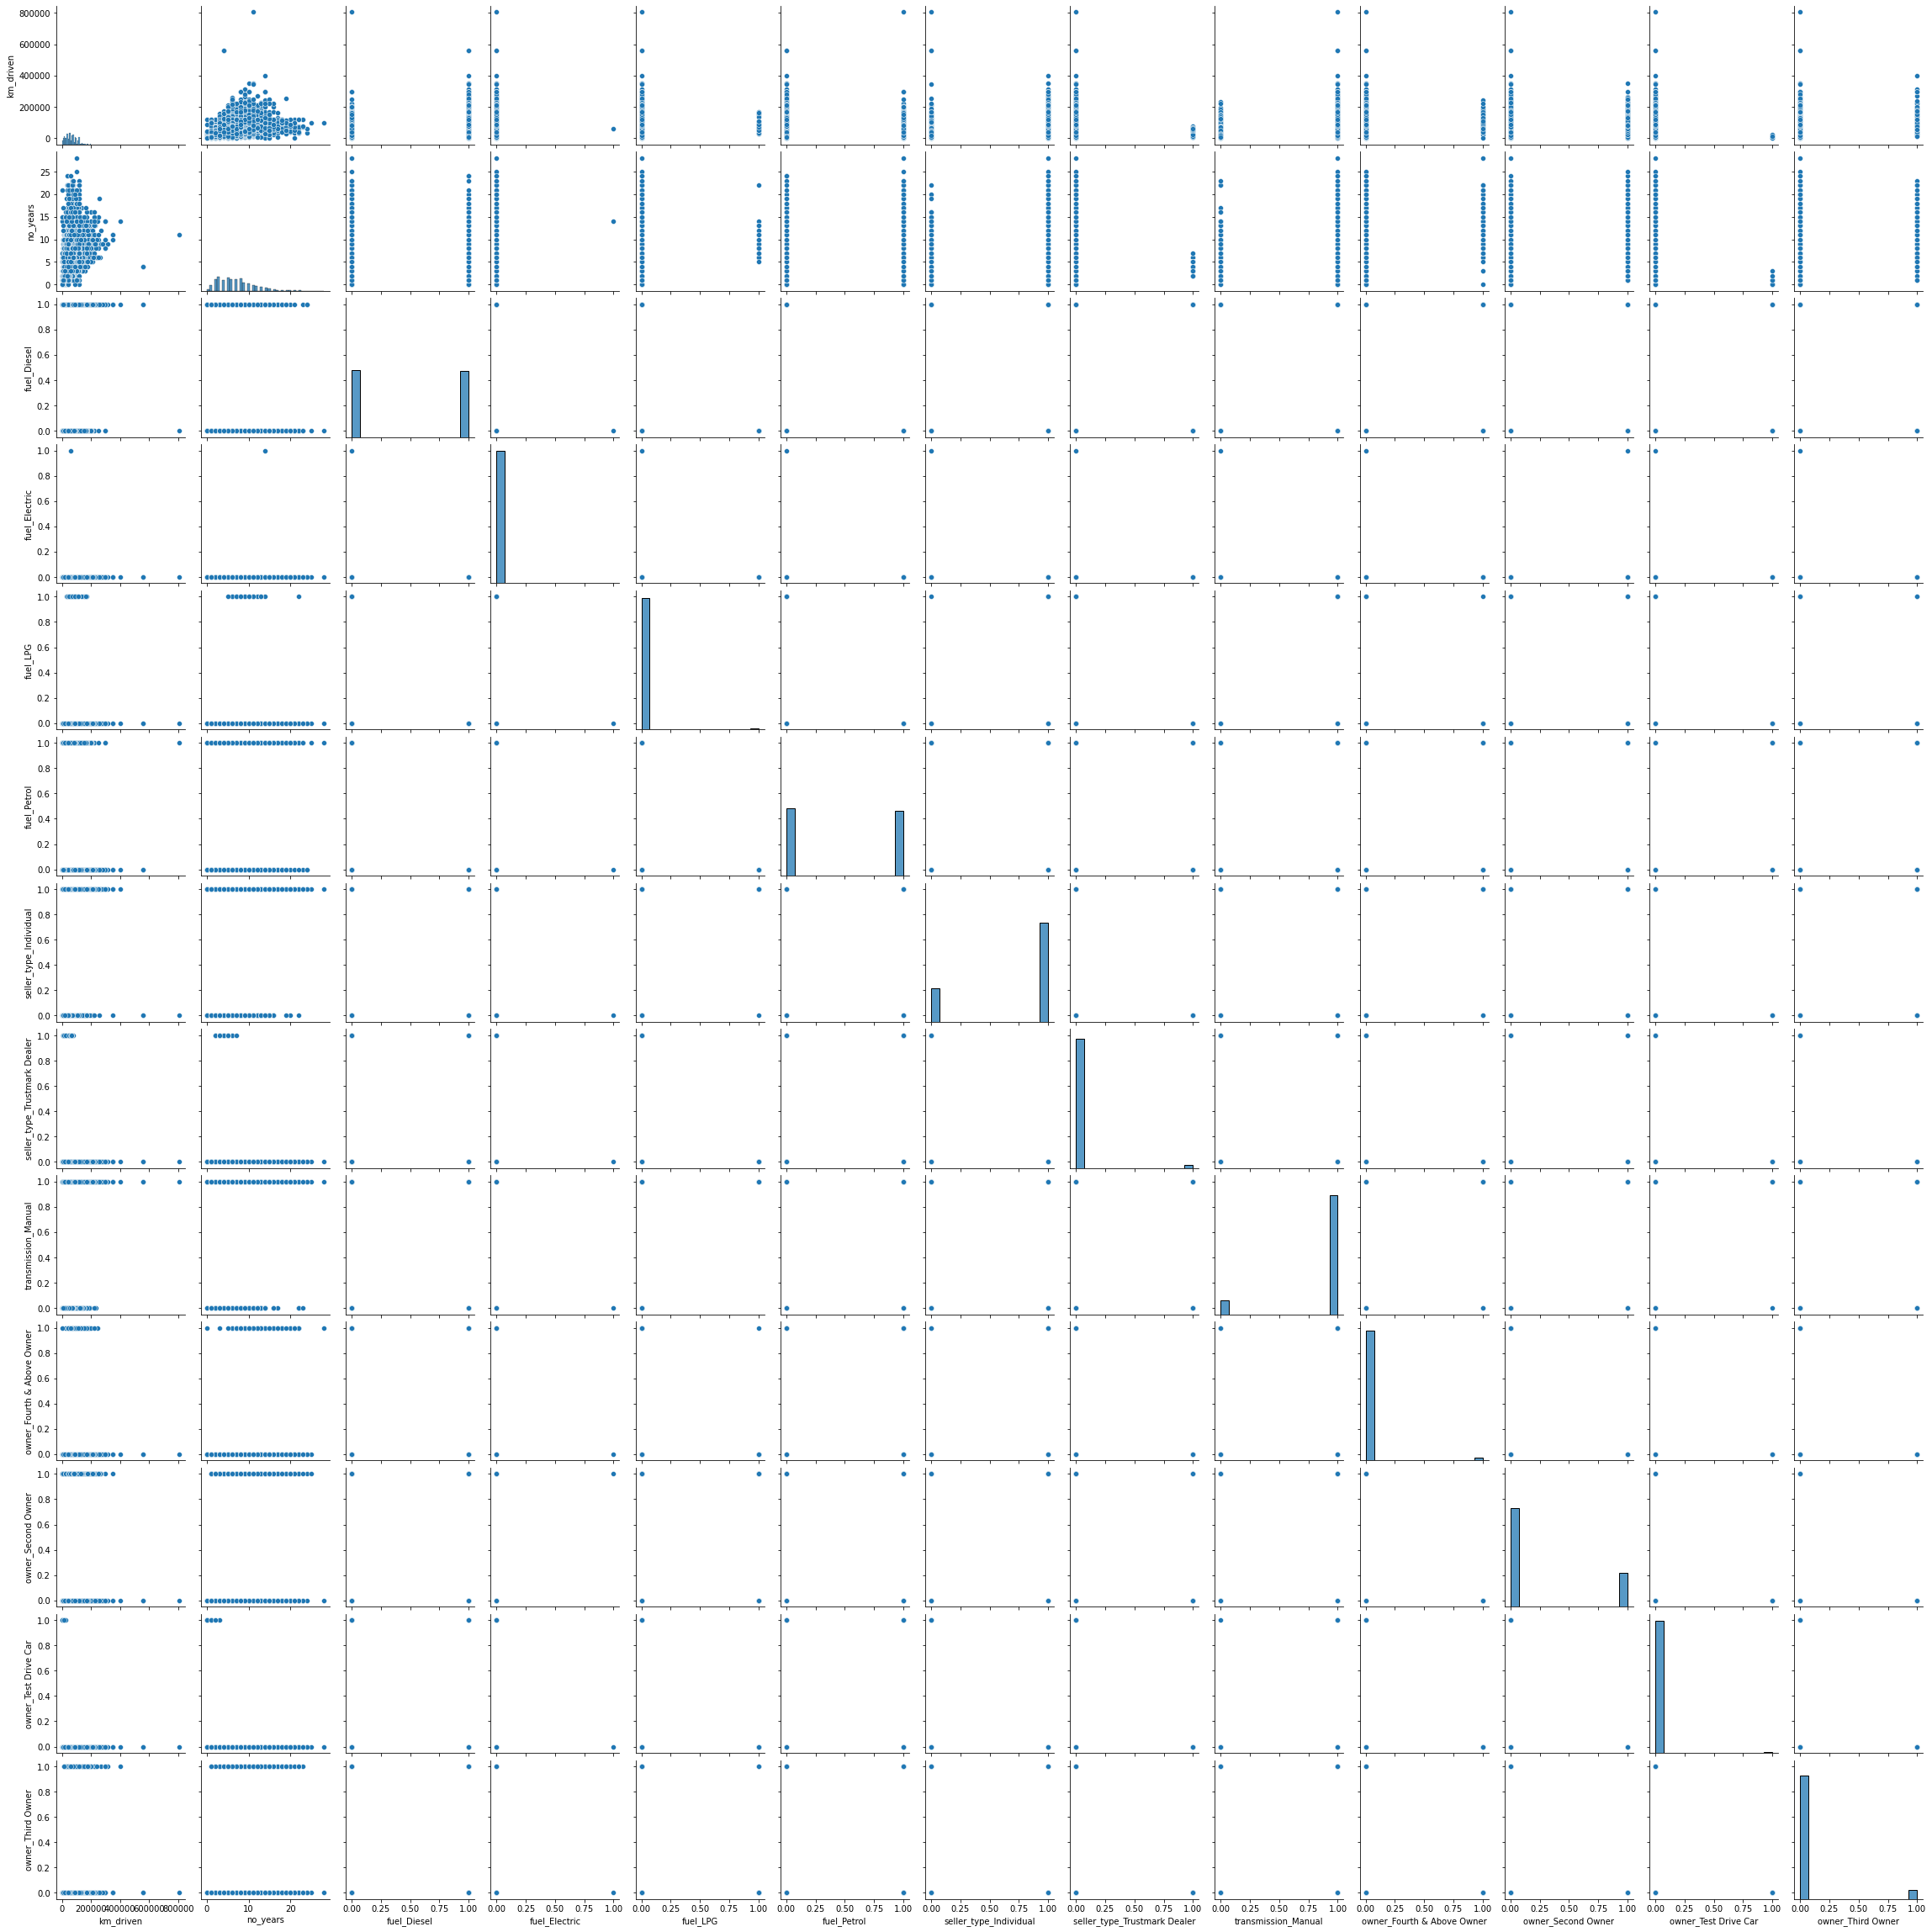

In [41]:
sns.pairplot(final_dataset)

In [42]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

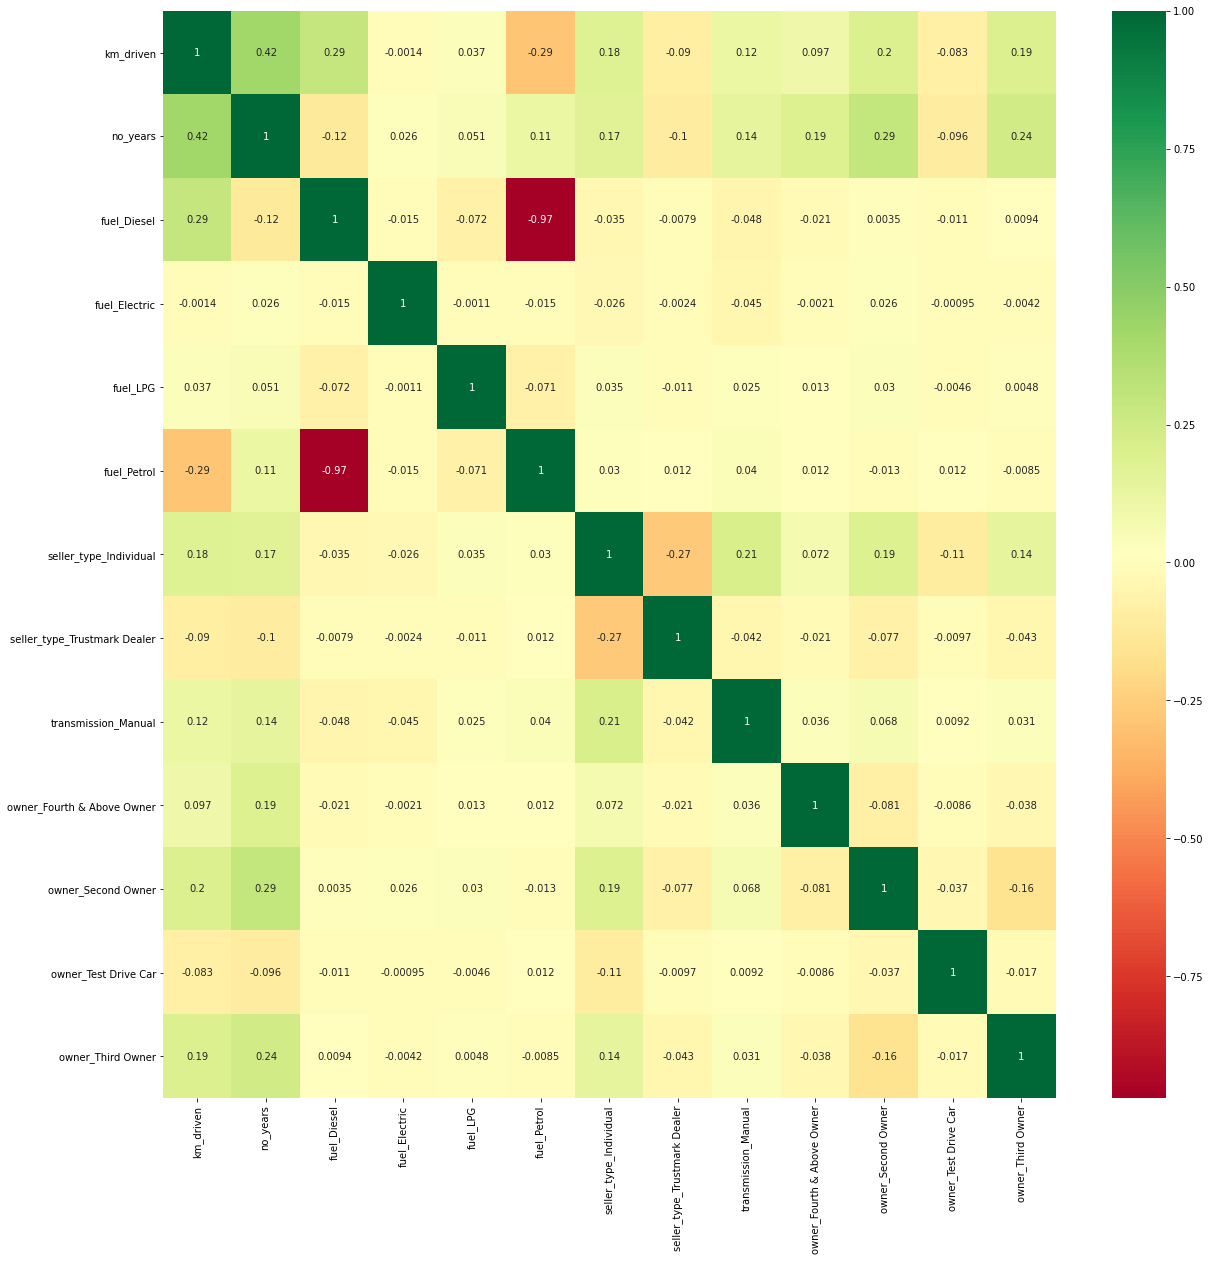

In [44]:
corrmat=final_dataset.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
x=final_dataset.iloc[:,:]
y=data['selling_price']

In [50]:
x.head()

,km_driven,no_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [51]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [53]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=a8779d9622b38c0d397655c1edcce0871bb1e40857251a33f93dbc733ed4f50b
  Stored in directory: c:\users\pablo\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [57]:
##feature importance implenting algorithm to get the important feature
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [58]:
print(model.feature_importances_)

[2.44727746e-01 2.49286193e-01 1.30526047e-01 3.82495708e-05
 2.57791822e-05 2.19419244e-04 4.72590064e-02 8.43403429e-03
 2.92828829e-01 7.19328009e-04 2.10557103e-02 8.09044194e-04
 4.07061432e-03]


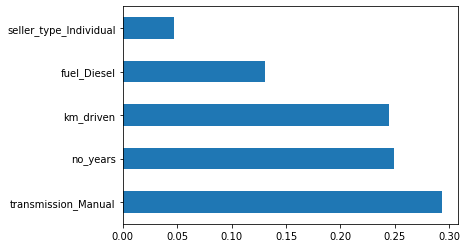

In [61]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=x.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
x_train.shape

(3472, 13)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [69]:
## hyperparameter
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [70]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [71]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [73]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
print(rf_random.best_params_)

{'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [77]:
rf_random.best_score_

-114437310741.30998

In [78]:
predictions=rf_random.predict(x_test)

C:\Users\Pablo\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

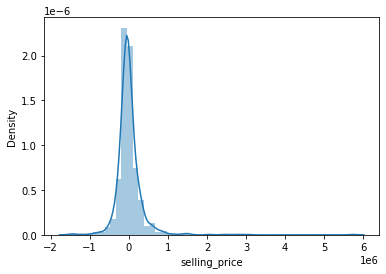

In [79]:
sns.distplot(y_test-predictions)

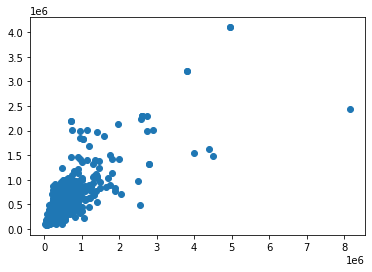

In [80]:
plt.scatter(y_test,predictions)

In [82]:
from sklearn import metrics

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 185506.4646290903
MSE: 138674128669.39478
RMSE: 372389.7537116116


In [84]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)